In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np

##### *Дополнительные задания:
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
data = wine.data

In [5]:
data.shape

(178, 13)

In [6]:
target = wine.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
fn = wine.feature_names
fn

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [8]:
#for line in wine.DESCR.split('\n'):
#    print(line)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.

In [9]:
target.shape

(178,)

In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

ответ: 3 класса

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [15]:
X = pd.DataFrame(data, columns=fn)

6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [17]:
X['target'] = target.astype(np.int64)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

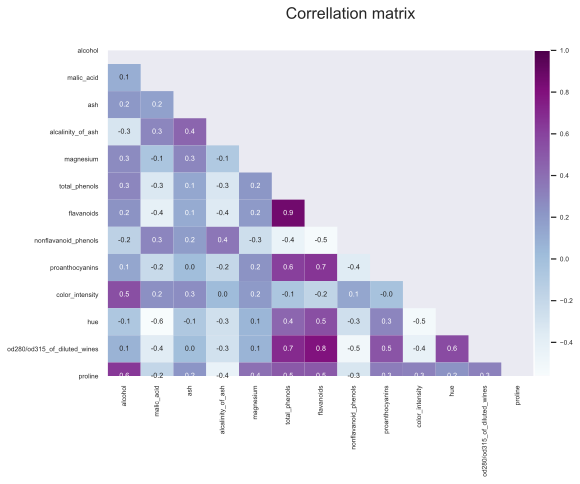

In [113]:
#без классов
X_corr1 = X.drop(['target'], axis=1).corr()
#с классами
X_corr2 = X.corr()


# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig, ax1 = plt.subplots(ncols=1, sharex=True, sharey=True)

fig.set_size_inches(9, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

sns.set(font_scale=0.6)
fig.suptitle('Correllation matrix', fontsize=16)


mask1 = np.zeros_like(X_corr1, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True

#sns.heatmap(X_corr1, mask=mask, ax=ax1, cbar=False, annot=True, fmt=".1f", linewidths=.5, cmap='BuPu')
sns.heatmap(X_corr1, mask=mask1, ax=ax1, cbar=False, annot=True, fmt=".1f", cmap='BuPu')
fig.colorbar(ax1.collections[0], ax=ax1, location='right', use_gridspec=False, pad=0)



# mask2 = np.zeros_like(X_corr2, dtype=np.bool)
# mask2[np.triu_indices_from(mask2)] = True

# sns.heatmap(X_corr2, mask=mask2, ax=ax2, cbar=False, annot=True, fmt=".1f", cmap='BuPu')
# #fig.colorbar(ax2.collections[0], ax=ax2, location='right', use_gridspec=False, pad=0)

# ax2.xaxis.
# ax2.yaxis.tick_right()
# ax2.tick_params(rotation=90)

plt.show()


In [114]:
# вне ДЗ, смотрю plotly
# источник: https://habr.com/ru/company/ods/blog/323210/

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [115]:
fn

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [117]:
import plotly.figure_factory as ff

figure = ff.create_scatterplotmatrix(
    X_corr2[fn, 'target'],
    diag='histogram',
    index='target')



TypeError: '(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'], 'target')' is an invalid key

In [ ]:
figure = ff.create_annotated_heatmap(
    z=X_corr1.values,
    x=list(X_corr1.columns),
    y=list(X_corr1.index),
    annotation_text=X_corr1.round(2).values,
    showscale=True)